# Εργασία 2

## Student Credentials 
**Αρίστη Παπασταύρου**: sdi1800154\
**Βησσαρίων Μουτάφης**: sdi1800119


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for scientific comoutations
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
from math import isnan

# for the text processing
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# for plots
import matplotlib.pyplot as plt
import matplotlib


nltk.download('stopwords')
nltk.download('wordnet')
##################################################################

# Ignoring unnecessory warnings
import warnings
warnings.filterwarnings("ignore")  
# Specialized container datatypes
import collections
# For Map vizualization
import folium
from nltk.corpus import genesis
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Natural language processing library
import nltk
nltk.download('genesis')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS
# For image processing
from PIL import Image, ImageOps
# For random selection 
import random
# For basic cleaning and data preprocessing 
import re
import string 
import requests
# Communicating with operating and file system
import os
# Machine learning libary
# Word2Vec embeeding vectors
from gensim.models.phrases import Phrases, Phraser
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import SparsePCA, PCA, TruncatedSVD
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, normalize, label_binarize, StandardScaler
from sklearn.svm import SVC
# For wordcloud generating 
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Location = r'/content/drive/MyDrive/Collab-Datasets/'

true_df = pd.read_csv(Location+'True.csv',engine='python', error_bad_lines=False).copy() 
fake_df = pd.read_csv(Location+'Fake.csv',engine='python', error_bad_lines=False).copy()

Skipping line 10185: unexpected end of data


In [ ]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10183 entries, 0 to 10182
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10183 non-null  object
 1   text     10183 non-null  object
 2   subject  10183 non-null  object
 3   date     10183 non-null  object
dtypes: object(4)
memory usage: 318.3+ KB


In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


## 1. Data Preprocessing

### Data Cleaning

We can easily see that there are no null elements in any columns at neither *fake*, nor *true* news dataset. So we will remove punctuation elements and transform capital letters to lowercase letters.

In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


We can see that there are publisher names at the start of each text. We could sort that out in a new column so that we could add another feature in our variable set.

In [ ]:
def get_categorical_cols(df):
  numerical_cols = df._get_numeric_data().columns
  return list(set(df.columns) - set(numerical_cols))

def get_numerical_cols(df):
  return df._get_numeric_data().columns.tolist()

# remove all punctuation symbols from the categorical cols given by the user
def remove_punctuation(df, cols):
  for col in cols:
    df.loc[:, col] = df.loc[:, col].str.replace('[^\w\s]','')

# get every letter to lowercase in the categorical cols given by the caller
def evenize_text(df, cols):
  for col in cols:
    df.loc[:, col] = df.loc[:, col].str.lower()

# We will proceed in early stemming-lemmatizing so that we focus on the important words that matter 

# create a stemmer
stemmer = SnowballStemmer('english', ignore_stopwords=True)
# create a lemmatizer
wnl = WordNetLemmatizer()

# function to stem words of a clause
def stem(s):
  words = s.split()
  stemmed_clause = []
  for word in words:
    stemmed_clause.append(stemmer.stem(word))
  return ' '.join(stemmed_clause)
# function to lemmmatize words of a clause
def lemmatize(s):
   words = s.split()
   lemmatized_clause = []
   for word in words:
     lemmatized_clause.append(wnl.lemmatize(word))
   return ' '.join(lemmatized_clause)

# #function to process a clause
def process_clause(s):
  return stem(lemmatize(s))
  
# def post_process_df(df, cols):
#   for col in cols:
#     df.loc[:, col] = df.loc[:, col].apply(process_clause)

# clean the whole df.
# make sure that the <clause cols> (cols that contain sentences) will get further processing
def clean_df(df, clause_cols):
  cat_cols = get_categorical_cols(df)
  remove_punctuation(df, cat_cols)
  evenize_text(df, cat_cols)
  #post_process_df(df, clause_cols)

In [ ]:
# clean true news
clean_df(true_df, ['title', 'text'])

# clean fake news
clean_df(fake_df, ['title', 'text'])

In [ ]:
def get_publisher(df):
  #create new column that will either say "other" or the name of the reuters
  reuters = df['text'].values.tolist()
  new_col = []
  for i in reuters:
    if "reuter" in i.lower():
      name = i.partition('reuter')
      new_col.append(name[0] if len(name[0]) else "other")
    elif "reuters" in i.lower():
      name = i.partition('reuters')
      new_col.append(name[0] if len(name[0]) else "other")
    else:
      new_col.append("other")
  df['Publishers'] = new_col # add the column for the true news
get_publisher(true_df)
get_publisher(fake_df)
true_df.head()

,title,text,subject,date,Publishers
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsnews,december 31 2017,washington
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsnews,december 29 2017,washington
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsnews,december 31 2017,washington
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsnews,december 30 2017,washington
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsnews,december 29 2017,seattlewashington


In [ ]:
# connect the 2 dataframes 
fake_df['label'] = np.zeros(shape=(len(fake_df),1), dtype='int8')
true_df['label'] = np.ones(shape=(len(true_df),1), dtype='int8')
news_df = pd.concat([true_df, fake_df], ignore_index=True)
news_df.sample(frac=1)

,title,text,subject,date,Publishers,label
32259,4th of july why the shadow government hates in...,sartre 21st century wirethe only conclusion an...,us_news,july 4 2017,other,0
5393,senate advances nomination of trump pick pruit...,washington reuters the us senate on thursday ...,politicsnews,february 16 2017,washington,1
7365,tough reality check for trumps pledge of bette...,charlotte north carolina donald trumps promis...,politicsnews,november 10 2016,other,1
24051,top obama official we find illegal aliens but ...,this is maddening we have a president and cong...,politics,may 20 2016,other,0
15789,teen accidentally shot and killed by his fath...,on july 3 william brumby accidentally shot h...,news,july 4 2016,other,0
...,...,...,...,...,...,...
20327,trump comes back roaring calls out altleft and...,president donald trump ripped the media today ...,politics,aug 15 2017,other,0
19026,charles koch has the sads because he thinks h...,charles koch the billionaire ceo of koch indus...,news,january 10 2016,other,0
23468,insane man is scaling the trump tower right no...,haha no it s not ted cruz but a total nut job ...,politics,aug 10 2016,other,0
20383,trump hits back after news of north koreas nuc...,president trump made a forceful statement rega...,politics,aug 8 2017,other,0


### Data Analysis

#### 2.a Word-Clouds
Created function that produces a wordcloud for the df taken as a parameter. We chose to implement this query using wordclouds as it's easier for the user to visualise which topics are more common in the databse given.If we were to implement the same query with a simple graph, the user wouldn't be able to comprehend the results because of the massive information given


In [ ]:
response = requests.get("https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png")
file = open("sample_image.png", "wb")
file.write(response.content)
file.close()

In [ ]:
#visualization of true new with a wordcloud

#First,find most frequently used words in the title column (lets say 3000 words)
def make_word_cloud(df):
  freq_words = pd.Series(' '.join(df['title']).lower().split())[:3000].tolist()
#remove words,that their length is less than 3 letters as they are mostly connective words with no apparent meaning
  for i in freq_words:
    if len(i)<=2:
      freq_words.remove(i)

  unique_string=(" ").join(freq_words)
  stopwords = set(STOPWORDS)
  maskImageArray = np.array(Image.open('sample_image.png'))
  stop_words = nltk.corpus.stopwords.words('english')
  news_wordcloud = WordCloud(max_words=3000,mask=maskImageArray, background_color="white", stopwords=stopwords).generate(unique_string)
  plt.imshow(news_wordcloud)
  plt.axis('off')
  plt.show()  

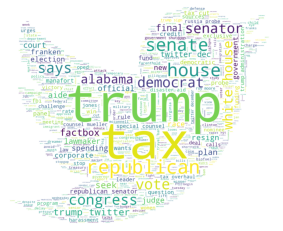

In [ ]:
make_word_cloud(true_df)

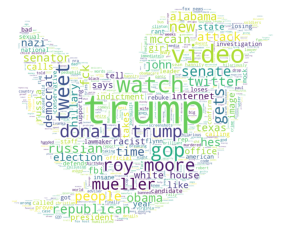

In [ ]:
make_word_cloud(fake_df)

#### 2.b Word Percentage


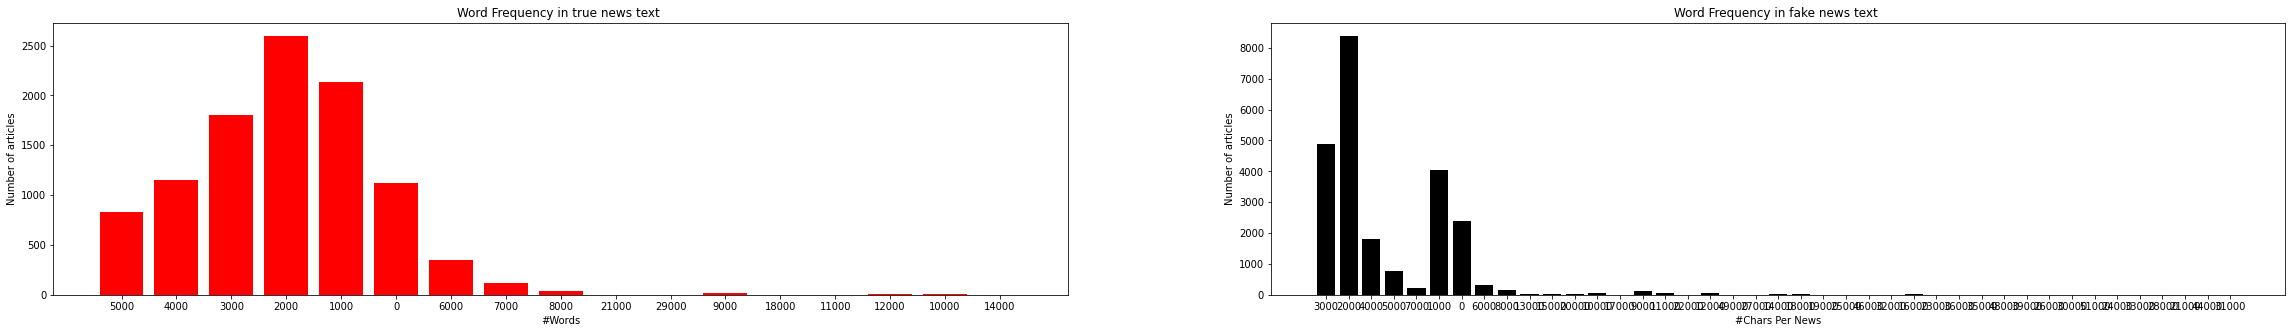

In [ ]:
def word_percentage(df1,df2):
  #get only the values from the "text" column, as we are trying to see whether there is a motive.
  #In the graphs below we will be able to visualise which kind of news have the longest/shortest text average
  texts1 = df1['text'].values.tolist()
  texts2 = df2['text'].values.tolist()
  temp1 = []
  temp2 = []
  #we round up the numbers to the closest 1000 in order to visualise better the result
  for i in texts1:
    rounded_size = round(len(i)/1000)*1000
    temp1.append(str(rounded_size))
  for j in texts2:
    rounded_size = round(len(j)/1000)*1000
    temp2.append(str(rounded_size))
  #search in the temp list how many articles can be grouped together because of their similar length
  count1 = collections.Counter(temp1)
  count2 = collections.Counter(temp2)
  x1_axis,y1_axis = zip(*count1.items())
  x2_axis,y2_axis = zip(*count2.items())
  
  #make plots to visualise the results
  fig, axes = plt.subplots(1, 2, figsize=(40,5))
  axes[0].bar(list(x1_axis), list(y1_axis), color='red')
  title = "Word Frequency in true news text "
  axes[0].set_title(title)
  axes[0].set_xlabel("#Words")
  axes[0].set_ylabel("Number of articles")

  axes[1].bar(list(x2_axis), list(y2_axis), color='black')
  title = "Word Frequency in fake news text "
  axes[1].set_title(title)
  axes[1].set_xlabel("#Chars Per News")
  axes[1].set_ylabel("Number of articles")
  
word_percentage(true_df,fake_df)

#### 2.c Word Count Distribution 

We will display the **word-count  distribution** of title and text. \
To do that we will use a **barplot**.

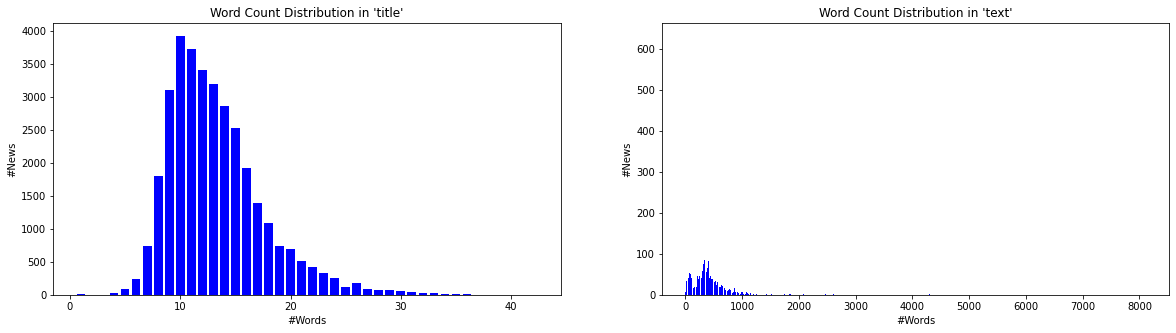

In [ ]:
# get them in a specific series
news_title = news_df['title']
news_text = news_df['text']

def count_words(series):
  # get the number of records with n words per 
  count_dist = series.str.split().apply(len).value_counts()
  return count_dist.index.values, count_dist.to_list()


fig, axes = plt.subplots(1, 2, figsize=(20,5))
  
for ax, d in zip(axes, [news_title, news_text]):
  x, y = count_words(d)
  ax.bar(x, y, color='blue')
  title = "Word Count Distribution in '" + d.name + "'"
  ax.set_title(title)
  ax.set_xlabel("#Words")
  ax.set_ylabel("#News")

#### 2.d Word Count Distribution w\out Stopwords 
Now we will do the same as before but we will make sure that we will clean the df from stopwords 

In [ ]:
# first clean the data from stop words
to_remove = set(stopwords.words())
news_df['title'] = news_df['title'].apply(lambda _s : ' '.join([word for word in _s.split() if not word in to_remove]))
news_df['text'] = news_df['text'].apply(lambda _s : ' '.join([word for word in _s.split() if not word in to_remove]))

news_df.head()

,title,text,subject,date,Publishers,label
0,us budget fight looms republicans flip fiscal ...,washington reuters head conservative republica...,politicsnews,december 31 2017,washington,1
1,us military accept transgender recruits monday...,washington reuters transgender people allowed ...,politicsnews,december 29 2017,washington,1
2,senior us republican senator let mr mueller job,washington reuters special counsel investigati...,politicsnews,december 31 2017,washington,1
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,politicsnews,december 30 2017,washington,1
4,trump wants postal service charge much amazon ...,seattlewashington reuters president donald tru...,politicsnews,december 29 2017,seattlewashington,1


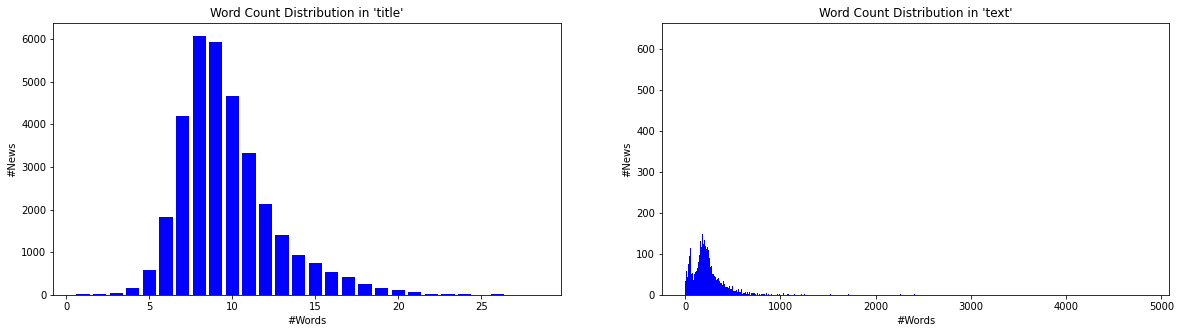

In [ ]:
# get them in a specific series
news_title = news_df['title']
news_text = news_df['text']

def count_words(series):
  # get the number of records with n words per 
  count_dist = series.str.split().apply(len).value_counts()
  return count_dist.index.values, count_dist.to_list()


fig, axes = plt.subplots(1, 2, figsize=(20,5))
  
for ax, d in zip(axes, [news_title, news_text]):
  x, y = count_words(d)
  ax.bar(x, y, color='blue')
  title = "Word Count Distribution in '" + d.name + "'"
  ax.set_title(title)
  ax.set_xlabel("#Words")
  ax.set_ylabel("#News")

#### 2.e Top n bigrams in 'title' and 'text'

We will create all the bigrams with a bag of words and create a routine that will print the top n bigrams in a barplot.

In [ ]:
def print_barp(xy, top_n, col, ax):
  x, y = map(list, zip(*xy))
  title = "Top-" + str(top_n) + " bigrams in column '" + col +"'" 
  ax.set_title(title)
  ax.bar(x, y)

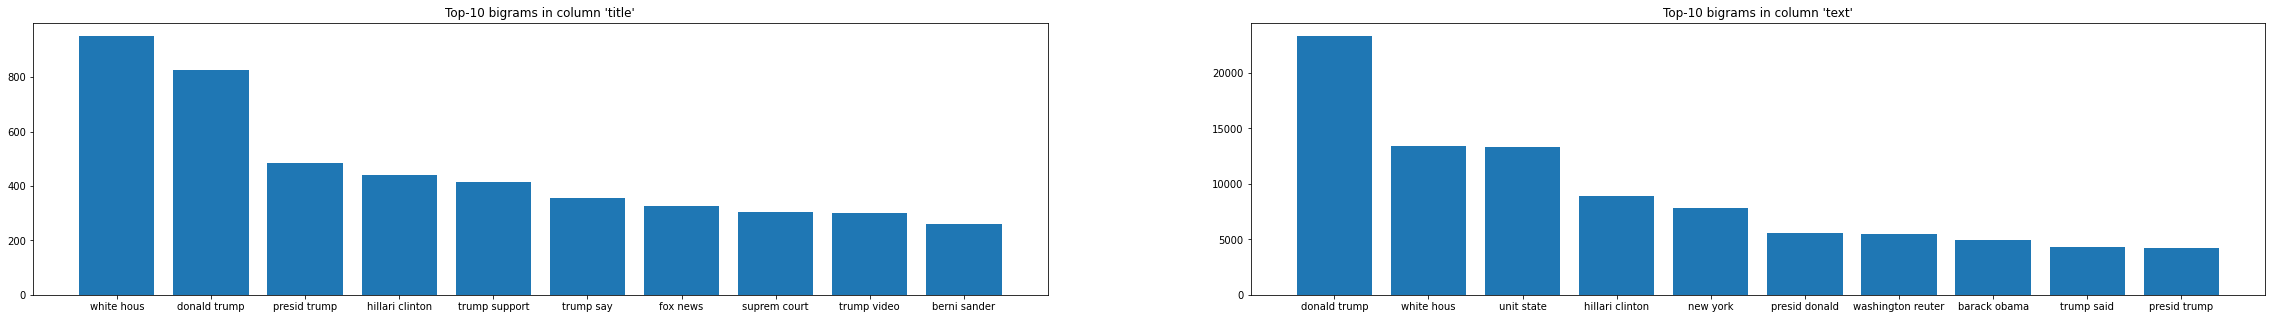

In [ ]:
bi_features = 300
top_n = 10
fig, axes = plt.subplots(1,2, figsize=(40,5))

for ax, col in zip(axes, ['title', 'text']) :
  # create the corpus 
  corpus = list(map(stem, news_df[col].to_list()))
  # create the bigrams
  bigram_counter = CountVectorizer(ngram_range=(2,2), stop_words='english', max_df=0.8, min_df=0.0, max_features=bi_features, strip_accents='unicode')
  bigrams = bigram_counter.fit_transform(corpus)
  bigram_freq = bigrams.toarray().sum(axis=0)

  # get top_n 
  voc = sorted(bigram_counter.vocabulary_.keys(), key=lambda k : bigram_counter.vocabulary_[k])
  zip_obj = zip(voc, bigram_freq)
  top_n_bigrams = sorted(zip_obj, key=lambda t : t[1], reverse=True)[0:top_n] 

  print_barp(top_n_bigrams, top_n, col, ax)

### Train-Test Splitting

In [ ]:
#we have inserted the columns asked by the excercise, but we also kept the Publishers columns as it makes quering the database significantly quicker
train, test = train_test_split(news_df, test_size=0.2)
train.to_csv(Location+'train.csv')
test.to_csv(Location+'test.csv')

## DataSet Creation

Firstly, we will create the bigram_bow_vectors and the tf-idf vectors. 
Also we will train a Word2Vec word embeedings model and create the average document vectors for all the dataset records.  


In [ ]:
Y_train = train.pop('label')
X_train_df = train

Y_test = test.pop('label')
X_test_df = test 

In [ ]:
corpus = X_train_df.text.to_list()
bigram_features = 200

In [ ]:
#Bow
# create the vectorizers
bigram_counter = CountVectorizer(binary=True, ngram_range=(2,2), stop_words='english', max_df=0.8, min_df=0.0, max_features=bigram_features,strip_accents='unicode')
# create the vectors
bigram_bow_vectors = bigram_counter.fit_transform(corpus).toarray()

In [ ]:
# TF-IFD vectorizer and vector array
bi_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words='english', max_df=0.8, min_df=0.0, max_features=bigram_features, strip_accents='unicode')
X_train_tfidf = bi_tfidf_vectorizer.fit_transform(corpus).toarray()
X_test_tfidf = bi_tfidf_vectorizer.transform(X_test_df.text.to_list()).toarray()

In [ ]:
# define the sentences as bigrams
sent = [rec.split() for rec in X_train_df.text]
phrases = Phrases(sent, min_count = 10)
bigram_phrases = Phraser(phrases)
sentences = bigram_phrases[sent]

# create the model
w2v = gensim.models.Word2Vec(min_count=20,
                     window=2,
                     size=200,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=2)

# build the vocab
w2v.build_vocab(sentences)

# train the model
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=30)

# find the L2-norms
w2v.init_sims(replace=True)

In [ ]:
# estimate the average document vector for one record
def get_vector(record):
  word_list = [word for word in record.split() if word in w2v.wv.vocab]  
  if len(word_list)==0:
    return []
  sum_vec = w2v.wv.word_vec(word_list[0], use_norm=True).copy()
  for i in range(1, len(word_list)):
    sum_vec += w2v.wv.word_vec(word_list[i], use_norm=True).copy()
  vectors = np.asarray(sum_vec)
  avg_v = vectors/len(word_list)
  return avg_v


# estimate the average vectors for every record in the dataset
def get_document_vectors(df, col):
  df_cp = df.copy()
  vectors = []
  row_index = -1
  size = 0
  for rec in df_cp[col]:
    row_index+=1
    check = get_vector(rec)
    if check == []:
      vectors.append(np.zeros(size))
      continue
    vectors.append(check)
    size = check.shape
  #vectors = [get_vector(rec) for rec in df_cp[col]]
  return np.asarray(vectors)


In [ ]:
X_train_docv = get_document_vectors(X_train_df, 'text')
X_test_docv = get_document_vectors(X_test_df, 'text')

## Model Creation/Validation
Following we will estimate the *F1 score* and the models *Accuracy* and, finally, we will print a confusion matrix to so the True-False prediction percentage of the model.

In [ ]:
# define a function that will validate your model
def validate_model(model, Y_test, pred_features, pred_labels) :
  accuracy = model.score(pred_features, Y_test)
  f1 = round(f1_score(Y_test, pred_labels), 3) 
  print('\nAccuracy : {} %\nF1 : {} %'.format(accuracy*100, f1*100))

In [ ]:
# use a model
def use_model(model_initiator, x_train, y_train, x_test, y_test,nfolds,algo) :
  #create the model
  if algo == "LogisticRegression":
    model = model_initiator(n_jobs=8)
  elif algo == "Naive-BayesPos":
    model = MultinomialNB()
  elif algo == "Naive-Bayes":
    model = GaussianNB()
  elif algo == "Support-Vector-Machines":
    Cs = [0.1, 1, 10]
    gammas = [0.1, 0.5, 1]
    param_grid = {'base_estimator__C': Cs, 'base_estimator__gamma' : gammas, 'base_estimator__kernel' : ['rbf', 'linear']}
    # create an tunning SVM classifier with enseble for speed up
    n_estimators = 20
    model = GridSearchCV(
            BaggingClassifier(base_estimator=
                SVC(), 
                n_estimators=n_estimators, 
                max_samples=1/n_estimators), 
            param_grid, 
            cv=nfolds, 
            n_jobs=-1
          )
  elif algo == "RandomForest":
    model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
  # init variables
  scaler = StandardScaler(with_mean=False)
  scaler.fit(x_train, y_train)
  X = scaler.transform(x_train)
  Y = y_train

  pred_features = scaler.transform(x_test)
  # fit the model
  model.fit(X, Y)
  # predict results for test set
  pred_labels = model.predict(pred_features)
  # validate model
  validate_model(model, y_test, pred_features, pred_labels)

  return pred_labels

In [ ]:
#Create confusion matrix for each algorithm.
def confusion_matrix_generator(y_test,pred_labels,algo,feature):
  cm = confusion_matrix(Y_test, pred_labels)
  labels_str=['Fake', 'True']
  _title = algo + " with " + feature
  sns.heatmap(cm/np.sum(cm), fmt='.2%', annot=True, xticklabels=labels_str, yticklabels=labels_str).set(title= _title)

### Logistic Regression

We will use sklearn Logistic Regression model.


#### 1. BoW

Train it with the BoW feature-vector and then predict the labels of the validation set.


Accuracy : 95.94534382890242 %
F1 : 93.10000000000001 %


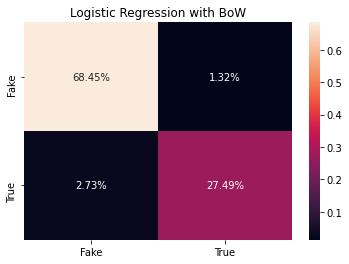

In [ ]:
pred_labels_bow = use_model(LogisticRegression, bigram_bow_vectors, Y_train, bigram_counter.transform(X_test_df.text.to_list()), Y_test,0,"LogisticRegression")
confusion_matrix_generator(Y_test,pred_labels_bow,"Logistic Regression","BoW")

#### 2. TF-IDF
Train it with the TF-IDF feature vector and then predict the labels on the respective validation set.


Accuracy : 95.91563938808851 %
F1 : 93.10000000000001 %


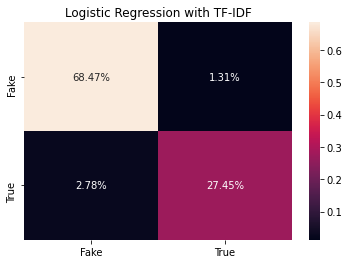

In [ ]:
pred_labels_tfidf = use_model(LogisticRegression, X_train_tfidf, Y_train, bi_tfidf_vectorizer.transform(X_test_df.text.to_list()).toarray(), Y_test,0,"LogisticRegression")
confusion_matrix_generator(Y_test,pred_labels_tfidf,"Logistic Regression","TF-IDF")

#### 3. Word2Vec

Now we will need to preprocess the text we got from news_df.

We will find the mean of all vectors and will name this vector as 'feature set' of the current data instance.


Accuracy : 97.56423585326006 %
F1 : 96.0 %


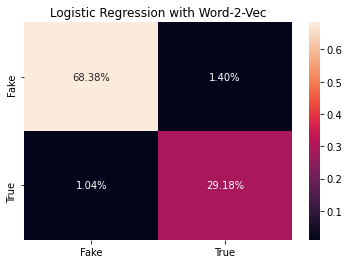

In [ ]:
pred_labels_word2vec = use_model(LogisticRegression, X_train_docv, Y_train, X_test_docv, Y_test,0,"LogisticRegression")
confusion_matrix_generator(Y_test,pred_labels_word2vec,"Logistic Regression","Word-2-Vec")

### Logistic Regression Results Commentary

- Since Logistic Regression performs accurately, we can assume that data given are linearly seperable. 

- We can also notice that the Word-2-Vec interpetation of the data works the best, since it resembles the dataset correlation between features and classes more accurately and it could obviously get separated by a 2-d plane.

### Naive Bayes

We will use sklearn Polynomial Naive Bayes model. In order to make it more efficient we used the  **Multinomial Naive Bayes** algorithm for the tf-idf vectors as well as with the bow vectors as it behaves much more accuratelely than with the Gaussian Naive Bayes. 

However with the Word-2-Vec model we used the Gaussian Naive Bayes as the dataset vectors contained negative values.

#### 1. BoW


Accuracy : 90.68765780484182 %
F1 : 86.0 %


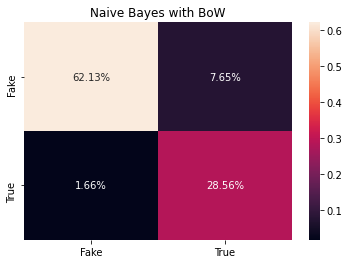

In [ ]:
pred_labels_bow = use_model(MultinomialNB, bigram_bow_vectors, Y_train, bigram_counter.transform(X_test_df.text.to_list()).toarray(), Y_test,0,"Naive-BayesPos")
confusion_matrix_generator(Y_test,pred_labels_bow,"Naive Bayes","BoW")

#### 2. TF-IDF


Accuracy : 90.4203178375167 %
F1 : 85.6 %


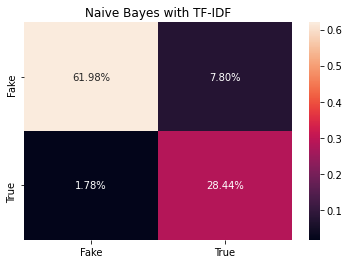

In [ ]:
pred_labels_tfidf = use_model(MultinomialNB, X_train_tfidf, Y_train, bi_tfidf_vectorizer.transform(X_test_df.text.to_list()).toarray(), Y_test,0,"Naive-BayesPos")
confusion_matrix_generator(Y_test,pred_labels_tfidf,"Naive Bayes","TF-IDF")

#### 3. Word2Vec


Accuracy : 89.4846279518788 %
F1 : 84.2 %


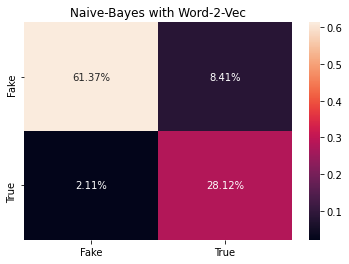

In [ ]:
pred_labels_word2vec = use_model(MultinomialNB,  X_train_docv, Y_train, X_test_docv, Y_test,0,"Naive-Bayes")
confusion_matrix_generator(Y_test,pred_labels_word2vec,"Naive-Bayes","Word-2-Vec")

###Naive Bayes Results Commentary

- Naive Bayes appears to behave more poorly than the Logistic Regression algorithm

- The above might occur due to some linear conditional dependency between some features.

- If we actually study the feature conditional dependency and eliminate it, we will increase the support of "Naive Bayes' Assumption"  and the model will perform significantly better.

### Support Vector Machines

we will also use the sklearns support vector machines

#### 1. Bow


Accuracy : 95.47007277588 %
F1 : 92.30000000000001 %


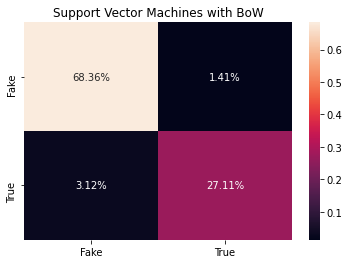

In [ ]:
pred_labels_bow = use_model(GridSearchCV,bigram_bow_vectors, Y_train, bigram_counter.transform(X_test_df.text.to_list()).toarray(), Y_test, 2,"Support-Vector-Machines")
confusion_matrix_generator(Y_test,pred_labels_bow,"Support Vector Machines","BoW")

#### 2.TF-IDF


Accuracy : 95.4403683350661 %
F1 : 92.2 %


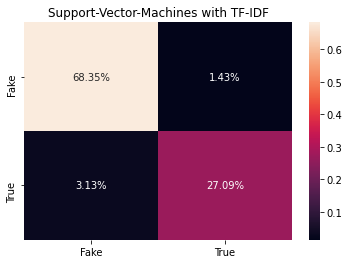

In [ ]:
pred_labels_tfidf = use_model(GridSearchCV,X_train_tfidf, Y_train, X_test_tfidf, Y_test, 2,"Support-Vector-Machines")
confusion_matrix_generator(Y_test,pred_labels_tfidf,"Support-Vector-Machines","TF-IDF")

#### 3. Word2Vec


Accuracy : 97.34145254715581 %
F1 : 95.6 %


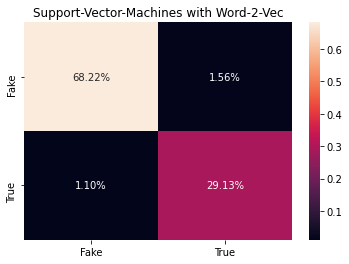

In [ ]:
pred_labels_word2vec = use_model(GridSearchCV,  X_train_docv, Y_train, X_test_docv, Y_test,2,"Support-Vector-Machines")
confusion_matrix_generator(Y_test,pred_labels_word2vec,"Support-Vector-Machines","Word-2-Vec")

### Support Vector Machines Result Commentary

- It's easy to observe that the svm algorithm behaves as good as the logistic-regression  algorithm. This result comes from the fact that the records are linearly separable.
The only significant difference is that while logistic regression just chooses a 2-d plane, SVM chooses the optimal 2-d plane that has the fartest distance from the data.

### Random Forests

#### 1. Bow


Accuracy : 96.3463537798901 %
F1 : 93.8 %


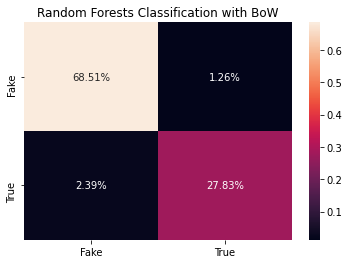

In [ ]:
pred_labels_bow = use_model(RandomForestClassifier, bigram_bow_vectors, Y_train, bigram_counter.transform(X_test_df.text.to_list()).toarray(), Y_test,0,"RandomForest")
confusion_matrix_generator(Y_test,pred_labels_bow,"Random Forests Classification","BoW")

#### 2.TF-IDF


Accuracy : 96.24238823704144 %
F1 : 93.60000000000001 %


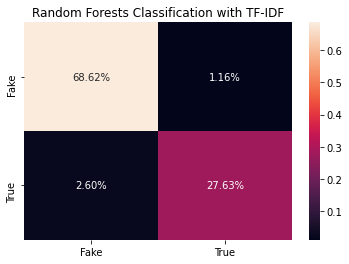

In [ ]:
pred_labels_tfidf = use_model(RandomForestClassifier, X_train_tfidf, Y_train, bi_tfidf_vectorizer.transform(X_test_df.text.to_list()).toarray(), Y_test,0,"RandomForest")
confusion_matrix_generator(Y_test,pred_labels_tfidf,"Random Forests Classification","TF-IDF")

#### 3. Word2Vec


Accuracy : 96.45031932273875 %
F1 : 94.0 %


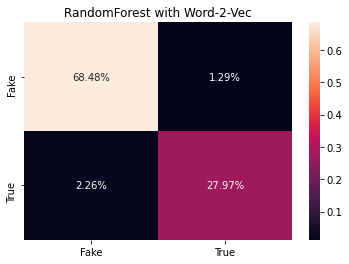

In [ ]:
pred_labels_word2vec = use_model(RandomForestClassifier,  X_train_docv, Y_train, X_test_docv, Y_test,0,"RandomForest")
confusion_matrix_generator(Y_test,pred_labels_word2vec,"RandomForest","Word-2-Vec")

### Random Forest Result Commentary

- Random Forests tend to have high accuracy prediction and can handle large numbers of features due to the embedded feature selection in the model generation process. 

- It creates many classification trees and a bootstrap sample technique is used to train each tree from the set of training data. This method only searches for a random subset of variables in order to obtain a split at each node. For the classification, the input vector is fed to each tree in the RF and each tree votes for a class.




## 3.Beat the Benchmark

We will try to better-fit the Random Forest algorithm.

### Actions taken:

- Better data cleaning: Removing stopwords, remove NULL values, remove duplicates, stemming, concat title and text columns.

- Model Tuning: Tuning the N-estimators parameter of RF classifier



In [ ]:
def normalize_vectors(x_train,x_test):
  scaler = MinMaxScaler()
  scaled_x_train = scaler.fit_transform(x_train)
  scaled_x_test = scaler.fit_transform(x_test)

  return scaled_x_train,scaled_x_test

In [ ]:
def classifier(x_train, y_train, x_test, y_test) :
  #create the model
  param_dict = {
      'n_estimators': [50, 100, 150, 200],
      }

  model = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=123456) ,param_grid=param_dict, cv=5, n_jobs=-1)
  # init variables
  scaler = StandardScaler(with_mean=False)
  scaler.fit(x_train, y_train)
  X = scaler.transform(x_train)
  Y = y_train


  pred_features = scaler.transform(x_test)
  # fit the model
  model.fit(X, Y)
  # predict results for test set
  pred_labels = model.predict(pred_features)
  # validate model
  validate_model(model, y_test, pred_features, pred_labels)

  return pred_labels


In [ ]:
def better_data_preprocessing(df):
  # drop NA
  df.dropna(inplace=True)
  # remove punctuation and transform to lower 'title' and 'text' columns
  remove_punctuation(df, ['title', 'text'])
  evenize_text(df, ['title', 'text'])
  # remove stopwords and title, text
  to_remove = set(stopwords.words())
  df['text'] = df['text'].apply(lambda _s : ' '.join([word for word in _s.split() if not word in to_remove]))
  # concat title, text
  df['title-text'] = df['text'].copy() + df['subject'].copy()
  # stem column
  df['title-text'] = df["title-text"].apply(lemmatize)

  # remove duplicates
  df.drop_duplicates(subset=['title-text'], keep='first', inplace=True)
  df.reset_index()
  return df.copy()

In [ ]:
#reclean the data
true_df = pd.read_csv(Location+'True.csv',engine='python', error_bad_lines=False).head(5000).copy() #,engine='python', error_bad_lines=False
fake_df = pd.read_csv(Location+'Fake.csv',engine='python', error_bad_lines=False).head(5000).copy()
# connect the 2 dataframes 
fake_df['label'] = np.zeros(shape=(len(fake_df),1), dtype='int8')
true_df['label'] = np.ones(shape=(len(true_df),1), dtype='int8')
news_df = pd.concat([true_df, fake_df], ignore_index=True)
news_df = news_df.sample(frac=1)

# clean the data 
clean_df = better_data_preprocessing(news_df)
clean_df.head()

Skipping line 10185: unexpected end of data


,title,text,subject,date,label,title-text
9696,watch trump gets humiliated by new york lawma...,15 years since world trade center twin towers ...,News,"September 10, 2016",0,15 year since world trade center twin tower fe...
4061,trump orders review of national monuments to a...,washington reuters us president donald trump s...,politicsNews,"April 26, 2017",1,washington reuters u president donald trump si...
899,in meeting trump to push a reluctant xi to rei...,washington reuters president donald trump pres...,politicsNews,"November 1, 2017",1,washington reuters president donald trump pres...
238,us top court takes up republican challenge to ...,washington reuters us supreme court friday add...,politicsNews,"December 8, 2017",1,washington reuters u supreme court friday adde...
5130,russian lawyer drops bomb on donald trump jr ...,first time adult life happy fact christmas sta...,News,"November 6, 2017",0,first time adult life happy fact christmas sta...


In [ ]:
train, test = train_test_split(clean_df, test_size=0.2)
Y_train = train.pop('label')
X_train_series = train['title-text']

Y_test = test.pop('label')
X_test_series = test['title-text'] 

In [ ]:
corpus = X_train_series.to_list()
bigram_features = 250

In [ ]:
#Bow
# create the vectorizers
bigram_counter = CountVectorizer(binary=True, ngram_range=(2,2), stop_words='english', max_df=0.75, min_df=0.0, max_features=bigram_features,strip_accents='unicode')
# create the vectors
X_train_series_bow = bigram_counter.fit_transform(corpus).toarray()
X_test_series_bow = bigram_counter.transform(X_test_series.to_list()).toarray()

In [ ]:
# TF-IFD vectorizer and vector array
bi_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words='english', max_df=0.75, min_df=0.0, max_features=bigram_features, strip_accents='unicode')
X_train_tfidf_series = bi_tfidf_vectorizer.fit_transform(corpus).toarray()
X_test_tfidf_series = bi_tfidf_vectorizer.transform(X_test_series.to_list()).toarray()

In [ ]:
sent = [rec.split() for rec in X_train_series]
phrases = Phrases(sent, min_count = 10)
bigram_phrases = Phraser(phrases)
sentences = bigram_phrases[sent]

# create the model
w2v = gensim.models.Word2Vec(min_count=20,
                     window=2,
                     size=200,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=2)

# build the vocab
w2v.build_vocab(sentences)

# train the model
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=30)

# find the L2-norms
w2v.init_sims(replace=True)

In [ ]:
X_train_df = pd.DataFrame(X_train_series,columns = ['title-text'])
X_test_df = pd.DataFrame(X_test_series,columns = ['title-text'])

In [ ]:
X_train_docv = get_document_vectors(X_train_df, 'title-text')
X_test_docv = get_document_vectors(X_test_df, 'title-text')


Accuracy : 97.5413948820873 %
F1 : 97.5 %


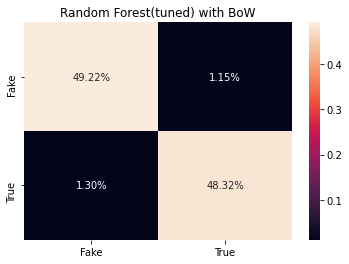

In [ ]:
pred_labels = classifier(X_train_series_bow, Y_train, X_test_series_bow, Y_test)
confusion_matrix_generator(Y_test,pred_labels,"Random Forest(tuned)","BoW")


Accuracy : 97.3406924234822 %
F1 : 97.3 %


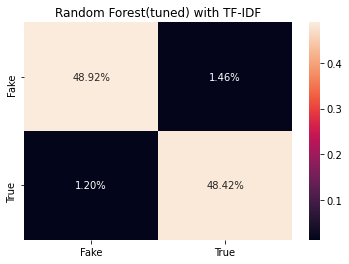

In [ ]:
pred_labels = classifier(X_train_tfidf_series, Y_train, X_test_tfidf_series, Y_test)
confusion_matrix_generator(Y_test,pred_labels,"Random Forest(tuned)","TF-IDF")


Accuracy : 97.0898143502258 %
F1 : 97.1 %


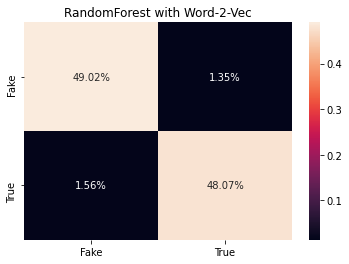

In [ ]:
pred_labels_word2vec = classifier(X_train_docv, Y_train, X_test_docv, Y_test)
confusion_matrix_generator(Y_test,pred_labels_word2vec,"RandomForest","Word-2-Vec")